CARREGAMENTO DOS PACOTES, DATASETS E VERIFICAÇÃO DOS VALORES AUSENTES

In [101]:
#Importação das Bibliotecas

import os
import subprocess
import json
import zipfile
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


 Criando o arquivo `kaggle.json` para autenticação na plataforma da Kaggle

In [8]:
def save_kaggle_config():
    load_dotenv()

    kaggle_config = {
        "username": os.getenv('USER'),
        "key": os.getenv('KEY')
    }

    os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)

    with open(os.path.join(os.path.expanduser("~"), ".kaggle/kaggle.json"), "w") as file:
        json.dump(kaggle_config, file)

    os.chmod(os.path.join(os.path.expanduser("~"), ".kaggle/kaggle.json"), 0o600)

save_kaggle_config()

Baixando o dataset `brazilian-ecommerce`

In [11]:
def download_kaggle_dataset(dataset: str) -> None:
    """
    Faz o download de um dataset do Kaggle.

    Parâmetros:
    - dataset (str): Nome so dataset.

    Retorna:
    - Nenhum valor de retorno. O dataset é baixado para o diretório "../data".
    """
    subprocess.run(["kaggle", "datasets", "download", "-d", dataset, "--path", "../data"])

download_kaggle_dataset("olistbr/brazilian-ecommerce")

Extraindo o dataset

In [12]:
def extract_dataset(zip_path: str, extract_path: str) -> None:
    """
    Extrai um conjunto de dados contido em um arquivo zip para um diretório específico.

    Parâmetros:
    - zip_path (str): Caminho do arquivo zip que contém o conjunto de dados.
    - extract_path (str): Diretório de destino para extrair o conjunto de dados.

    Retorna:
    - Nenhum valor de retorno. Extrai os arquivos para o diretório especificado.
    """
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)


extract_dataset("../data/brazilian-ecommerce.zip", "../data/brazilian_ecommerce")

Acessando o dataset através da biblioteca `pandas`

In [39]:
# Criação de uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

# Carregamento dos datasets
customers = pd.read_csv("../data/brazilian_ecommerce/olist_customers_dataset.csv", na_values = lista_labels_valores_ausentes)
geolocation = pd.read_csv("../data/brazilian_ecommerce/olist_geolocation_dataset.csv", na_values = lista_labels_valores_ausentes)
order_items = pd.read_csv("../data/brazilian_ecommerce/olist_order_items_dataset.csv", na_values = lista_labels_valores_ausentes)
payments = pd.read_csv("../data/brazilian_ecommerce/olist_order_payments_dataset.csv ", na_values = lista_labels_valores_ausentes)
reviews = pd.read_csv("../data/brazilian_ecommerce/olist_order_reviews_dataset.csv", na_values = lista_labels_valores_ausentes)
orders = pd.read_csv("../data/brazilian_ecommerce/olist_orders_dataset.csv", na_values = lista_labels_valores_ausentes)
products = pd.read_csv("../data/brazilian_ecommerce/olist_products_dataset.csv", na_values = lista_labels_valores_ausentes)
sellers = pd.read_csv("../data/brazilian_ecommerce/olist_sellers_dataset.csv", na_values = lista_labels_valores_ausentes)
category = pd.read_csv("../data/brazilian_ecommerce/product_category_name_translation.csv",na_values = lista_labels_valores_ausentes)


Mostrando o total de registros por dataset

In [40]:
# Total de registros por dataset
count_array = np.array([['customers', len(customers)],
                        ['geolocation', len(geolocation)],
                        ['order_items', len(order_items)],
                        ['payments', len(payments)],
                        ['reviews', len(reviews)],
                        ['orders', len(orders)],
                        ['products', len(products)],
                        ['sellers', len(sellers)],
                        ['category', len(category)]])
count_record = pd.DataFrame(count_array, columns = ['Arquivo', 'Total de Registros'])
count_record

,Arquivo,Total de Registros
0,customers,99441
1,geolocation,1000163
2,order_items,112650
3,payments,103886
4,reviews,99224
5,orders,99441
6,products,32951
7,sellers,3095
8,category,71


VERIFICANDO/TRATANDO VALORES AUSENTES

In [41]:
customers.shape

(99441, 5)

In [42]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [43]:
customers.isnull().values.any()

False

In [44]:
geolocation.shape

(1000163, 5)

In [45]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [46]:
geolocation.isna().any()

geolocation_zip_code_prefix    False
geolocation_lat                False
geolocation_lng                False
geolocation_city               False
geolocation_state              False
dtype: bool

In [47]:
order_items.shape

(112650, 7)

In [48]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [49]:
order_items.isnull().values.any()

False

In [50]:
payments.shape

(103886, 5)

In [51]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
payments.isnull().values.any()

False

In [53]:
reviews.shape

(99224, 7)

In [54]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [55]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [56]:
# Calculando o percentual de valores ausentes por coluna

round((reviews.isna().sum() / reviews.shape[0]).sort_values(ascending=False),2)

review_comment_title       0.88
review_comment_message     0.59
review_id                  0.00
order_id                   0.00
review_score               0.00
review_creation_date       0.00
review_answer_timestamp    0.00
dtype: float64

A Planilha "Reviews" possui 2 colunas com dados nulos:

    1. a coluna "review_coment_title" está com 88% de dados faltantes 
    2. a coluna "review_coment_message" está com 59% de dados faltantes

dadas asa alta proporção de dados faltantes para essas colunas faremos a remoção dessas colunas em nossas análises.

In [57]:
# Removendo as 2 colunas com alto percentual de valores ausentes
reviews = reviews.drop(['review_comment_title', 'review_comment_message'], axis= 1)

In [58]:
# Visualização do dataset review com as colunas removidas
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [59]:
# Conferindo se existem dados nulos no novo dataset
reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [60]:
orders.shape

(99441, 8)

In [61]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [62]:
orders.isnull().values.any()

True

In [63]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [64]:
# Calculando o percentual de valores ausentes por coluna

round((orders.isnull().sum() / orders.shape[0]).sort_values(ascending=False),2)

order_delivered_customer_date    0.03
order_delivered_carrier_date     0.02
order_approved_at                0.00
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64

A planilha "Orders" possui 3 colunas com valores ausentes:

    1. "Order_delivered_customer_date" com 3% de valores ausentes
    2. "Order_delivered_carrier_date" com 2% de valores ausentes
    3. "Order_approved_at" com menos de 1% dos dados ausentes

dada a proporção dos dados ausentes, considero a exclusão dessas linhas para seguirmos com as análises efetivas.

In [65]:
# Drop das linhas com valores ausentes
orders = orders.dropna()


In [66]:
#  Conferindo se existem valores ausentes
orders.isnull().values.any()

False

In [67]:
# conferindo o shape após o Drop das linhas
orders.shape

(96461, 8)

In [68]:
products.shape

(32951, 9)

In [69]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [70]:
products.isnull().values.any()

True

In [71]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [72]:
# Calculando o percentual de valores ausentes
round((products.isnull().sum() / products.shape[0]).sort_values(ascending=False),2)

product_category_name         0.02
product_name_lenght           0.02
product_description_lenght    0.02
product_photos_qty            0.02
product_weight_g              0.00
product_length_cm             0.00
product_height_cm             0.00
product_width_cm              0.00
product_id                    0.00
dtype: float64

Na planilha "Products" existem valores ausentes em todas as colunas que representam menos de 2% do percentual total.
Considerando o volume de ausência faremos a exclusão dessas linhas

In [73]:
# Excluindo as linhas com valores ausentes
products = products.dropna()

In [74]:
# Conferindo a planilha após o drop
products.shape

(32340, 9)

In [75]:
# Configurando o pandas para mostrar todas as linhas no output
pd.set_option('display.max_rows', None)

In [76]:
# Agrupamento e totalização das Categorias 
contagem_categorias = products['product_category_name'].value_counts()
print(contagem_categorias)

product_category_name
cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              918
perfumaria                                         868
papelaria                                          849
fashion_bolsas_e_acessorios                        849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                

In [77]:
# Restaurando a configuração de visualização padrão do pandas 
pd.reset_option('display.max_rows')

Devido a quantidade de categorias (73 ao total).
Realizaremos o agrupamento por semelhanças a fim de facilitar as análises.

In [78]:
# Reagrupamento das categorias
moda_acessorios = ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina',
                   'fashion_roupa_feminina', 'fashion_underwear_e_moda_praia', 'fashion_esporte', 'relogios_presentes','malas_acessorios', 'fashion_roupa_infanto_juvenil']

casa_decoracao = ['cama_mesa_banho', 'moveis_decoracao', 'moveis_escritorio', 'moveis_sala', 'moveis_quarto',
                  'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_colchao_e_estofado', 
                  'casa_conforto', 'casa_conforto_2', 'la_cuisine', 'utilidades_domesticas','eletroportateis', 'portateis_casa_forno_e_cafe','cool_stuff', 'eletrodomesticos', 'eletrodomesticos_2','artes_e_artesanato','ferramentas_jardim', 'climatizacao', 'moveis_colchao_e_estofado', 'portateis_cozinha_e_preparadores_de_alimentos','flores','artigos_de_natal', 'artigos_de_festas']

casa_construcao = ['construcao_ferramentas_construcao', 'casa_construcao', 'construcao_ferramentas_seguranca', 
                   'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_ferramentas','sinalizacao_e_seguranca']

eletronicos_tecnologia = ['informatica_acessorios', 'eletronicos', 'tablets_impressao_imagem', 'pcs','consoles_games', 'audio', 
                          'telefonia', 'telefonia_fixa', 'pc_gamer']

infantil = ['bebes']

automotivo = ['automotivo']

hobbies_entretenimento = ['esporte_lazer', 'brinquedos', 'instrumentos_musicais', 'cds_dvds_musicais', 'dvds_blu_ray',
                          'musica', 'cine_foto', 'artes', 'brinquedos', 'audio']

pet_shop = ['pet_shop']

livros_papelaria = ['livros_interesse_geral', 'livros_tecnicos ', 'livros_importados', 'papelaria']

saude_higiene = ['beleza_saude','perfumaria', 'fraldas_higiene']

alimentos_bebidas = ['alimentos_bebidas', 'alimentos', 'bebidas']

agro_ind_comercio = ['agro_industria_e_comercio','industria_comercio_e_negocios']

outros = ['seguros_e_servicos', 'market_place']

# Criando uma nova coluna 'categoria_agrupada' com valor padrão 'Outros'
products['categoria_agrupada'] = 'Outros'

# Aplicando os agrupamentos
products.loc[products['product_category_name'].isin(moda_acessorios), 'categoria_agrupada'] = 'Moda e Acessórios'
products.loc[products['product_category_name'].isin(casa_decoracao), 'categoria_agrupada'] = 'Casa e Decoração'
products.loc[products['product_category_name'].isin(casa_construcao), 'categoria_agrupada'] = 'Casa e Construção'
products.loc[products['product_category_name'].isin(eletronicos_tecnologia), 'categoria_agrupada'] = 'Eletrônicos e Tecnologia'
products.loc[products['product_category_name'].isin(hobbies_entretenimento), 'categoria_agrupada'] = 'Hobbies e Entretenimento'
products.loc[products['product_category_name'].isin(saude_higiene), 'categoria_agrupada'] = 'Saúde e Higiene'
products.loc[products['product_category_name'].isin(infantil), 'categoria_agrupada'] = 'Infantil'
products.loc[products['product_category_name'].isin(automotivo), 'categoria_agrupada'] = 'Automotivo'
products.loc[products['product_category_name'].isin(pet_shop), 'categoria_agrupada'] = 'Pet-Shop'
products.loc[products['product_category_name'].isin(livros_papelaria), 'categoria_agrupada'] = 'Livros e Papelaria'
products.loc[products['product_category_name'].isin(alimentos_bebidas), 'categoria_agrupada'] = 'Alimentos e Bebidas'
products.loc[products['product_category_name'].isin(agro_ind_comercio), 'categoria_agrupada'] = 'Agro, Ind. e Comércio'
products.loc[products['product_category_name'].isin(outros), 'categoria_agrupada'] = 'Outros'


In [79]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,categoria_agrupada
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,Saúde e Higiene
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,Hobbies e Entretenimento
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,Hobbies e Entretenimento
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,Infantil
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,Casa e Decoração


Criando um gráfico de barras com a biblioteca `matplotlib`

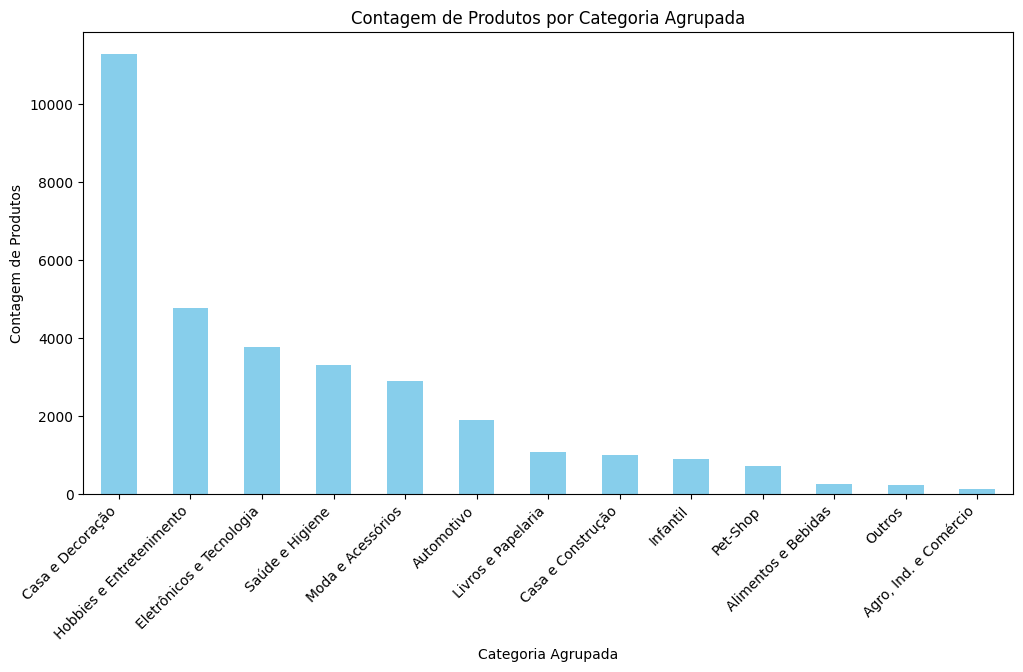

In [80]:
# Criando um gráfico de barras
plt.figure(figsize=(12, 6))  # Ajuste o tamanho conforme necessário

# Contar a frequência de cada categoria agrupada
contagem_categorias = products['categoria_agrupada'].value_counts()

# Plotar o gráfico de barras
contagem_categorias.plot(kind='bar', color='skyblue')
plt.title('Contagem de Produtos por Categoria Agrupada')
plt.xlabel('Categoria Agrupada')
plt.ylabel('Contagem de Produtos')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()

In [81]:
sellers.isnull().any()

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

In [82]:
category.isnull().values.any()

False

UNIFICANDO AS TABELAS

In [83]:
# Combinação dos conjuntos de dados relevantes
merged_data = pd.merge(orders, customers, on='customer_id')
merged_data = pd.merge(merged_data, order_items, on='order_id')
merged_data = pd.merge(merged_data, products, on='product_id')
merged_data = pd.merge(merged_data, reviews, on='order_id')
merged_data = pd.merge(merged_data, payments, on='order_id')


In [84]:
merged_data.shape

(113216, 35)

In [85]:
merged_data.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,categoria_agrupada,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,Casa e Decoração,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,Casa e Decoração,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,Casa e Decoração,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,13.0,Casa e Decoração,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,13.0,Casa e Decoração,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,13.0,Casa e Decoração,1bafb430e498b939f258b9c9dbdff9b1,3,2017-11-08 00:00:00,2017-11-10 19:52:38,1,boleto,1,44.09
6,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,Saúde e Higiene,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46
7,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-06-11 10:58:32,2018-06-14 13:03:00,2018-06-19 00:31:13,2018-07-16 00:00:00,7cfba6e55439cae3fd2479d62fafe67f,22240,...,19.0,Saúde e Higiene,87bed0b5fb6856c9328d5e60df70546a,5,2018-06-20 00:00:00,2018-06-20 13:12:42,1,credit_card,3,128.68
8,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,8b8028d453a01986b48c4271cc341475,14500,...,19.0,Saúde e Higiene,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5,2018-08-15 00:00:00,2018-08-18 16:12:50,1,credit_card,5,135.82
9,f913d229653fdd809c249ed98ab6b754,e1365d7b227b247b6bc0931771885eaf,delivered,2018-04-30 02:18:32,2018-04-30 03:00:14,2018-04-30 13:54:00,2018-05-08 17:53:51,2018-05-24 00:00:00,66c70ed7726abccfbee61a9a39de15c5,90050,...,19.0,Saúde e Higiene,ff25eee85259b7a0991f9643a0b6dc34,5,2018-05-09 00:00:00,2018-05-10 01:17:48,1,credit_card,4,137.45


In [86]:
merged_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
categoria_agrupada               0
review_id                        0
review_score        

In [87]:
# Configurar o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [88]:
# Exibir os nomes das colunas
for coluna in merged_data.columns:
    print(coluna)

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
categoria_agrupada
review_id
review_score
review_creation_date
review_answer_timestamp
payment_sequential
payment_type
payment_installments
payment_value


In [89]:
# Restaurando a configuração padrão 
pd.reset_option('display.max_columns')

In [90]:
merged_data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_sequential,payment_installments,payment_value
count,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,35084.548703,1.195052,119.869740,20.002353,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,4.082365,1.090809,2.943515,171.577925
std,29867.207356,0.687474,181.127416,15.710909,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,1.346005,0.686610,2.779137,264.218677
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,1.000000,1.000000,60.850000
50%,24315.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,1.000000,2.000000,107.970000
75%,58844.250000,1.000000,132.985000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,1.000000,4.000000,189.160000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,26.000000,24.000000,13664.080000


In [91]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113216 entries, 0 to 113215
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   customer_id                    113216 non-null  object 
 2   order_status                   113216 non-null  object 
 3   order_purchase_timestamp       113216 non-null  object 
 4   order_approved_at              113216 non-null  object 
 5   order_delivered_carrier_date   113216 non-null  object 
 6   order_delivered_customer_date  113216 non-null  object 
 7   order_estimated_delivery_date  113216 non-null  object 
 8   customer_unique_id             113216 non-null  object 
 9   customer_zip_code_prefix       113216 non-null  int64  
 10  customer_city                  113216 non-null  object 
 11  customer_state                 113216 non-null  object 
 12  order_item_id                 

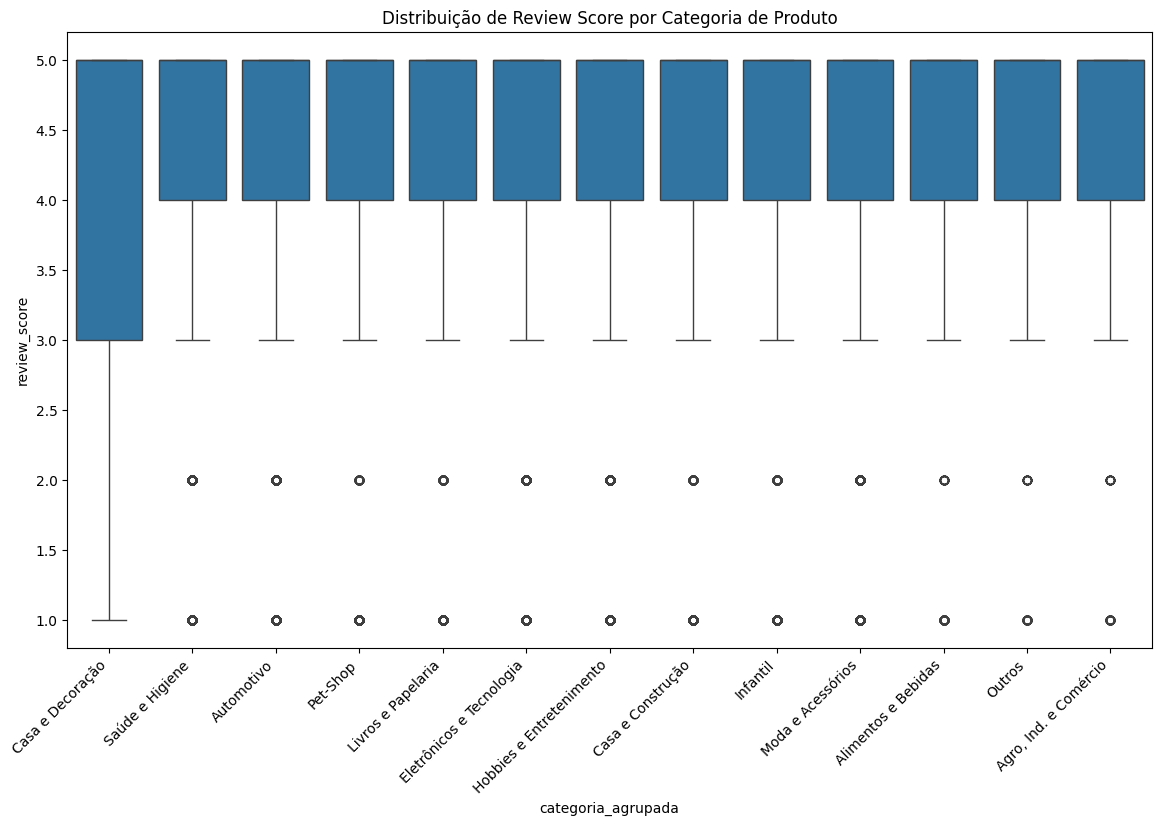

In [102]:

# Boxplot para avaliações por categoria de produto
plt.figure(figsize=(14, 8))
sns.boxplot(x='categoria_agrupada', y='review_score', data=merged_data)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição de Review Score por Categoria de Produto')
plt.show()

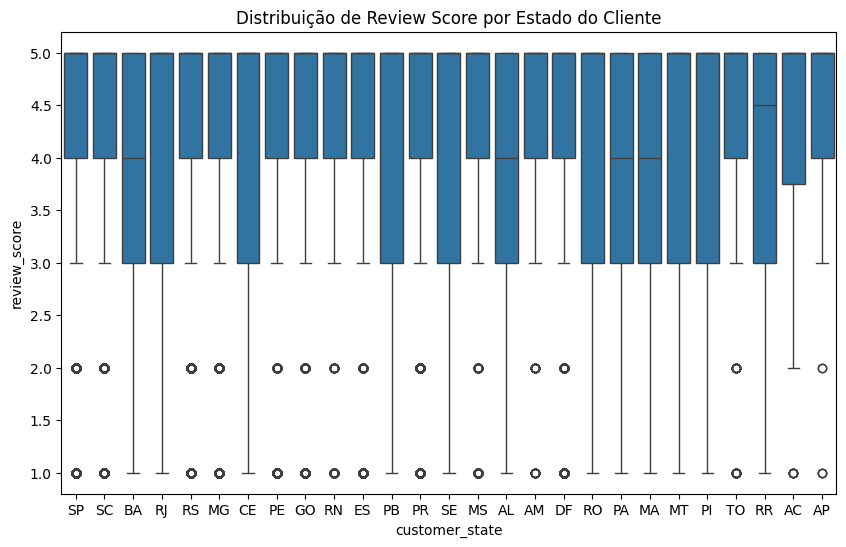

In [93]:
# Boxplot para avaliações por estado do cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_state', y='review_score', data=merged_data)
plt.title('Distribuição de Review Score por Estado do Cliente')
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\3603169874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='review_score', data=media_por_estado, palette='viridis')


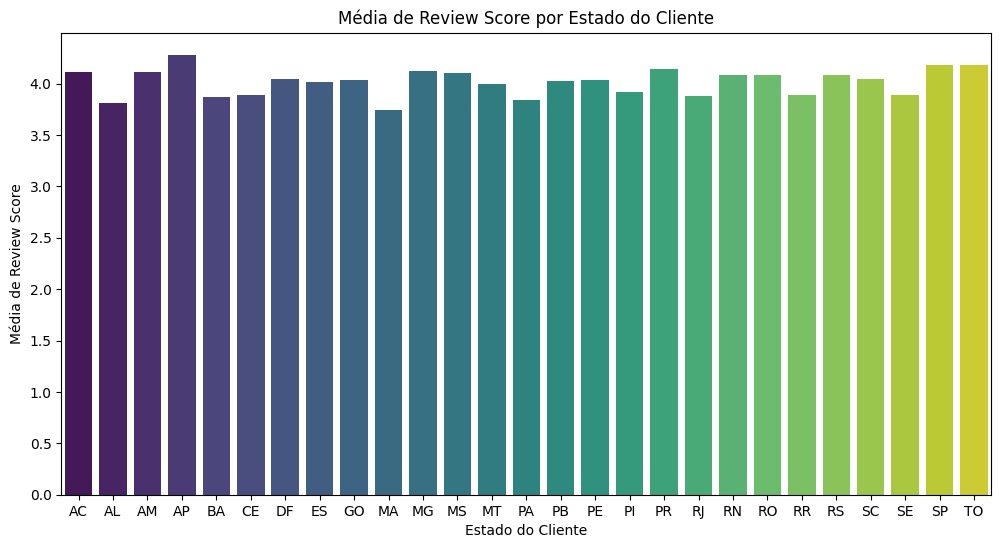

In [94]:
# Calcular a média das avaliações por estado
media_por_estado = merged_data.groupby('customer_state')['review_score'].mean().reset_index()

# Criar um gráfico de barras com a média das avaliações por estado
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='review_score', data=media_por_estado, palette='viridis')
plt.title('Média de Review Score por Estado do Cliente')
plt.xlabel('Estado do Cliente')
plt.ylabel('Média de Review Score')
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\938321559.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='review_score', data=contagem_por_estado, palette='viridis')


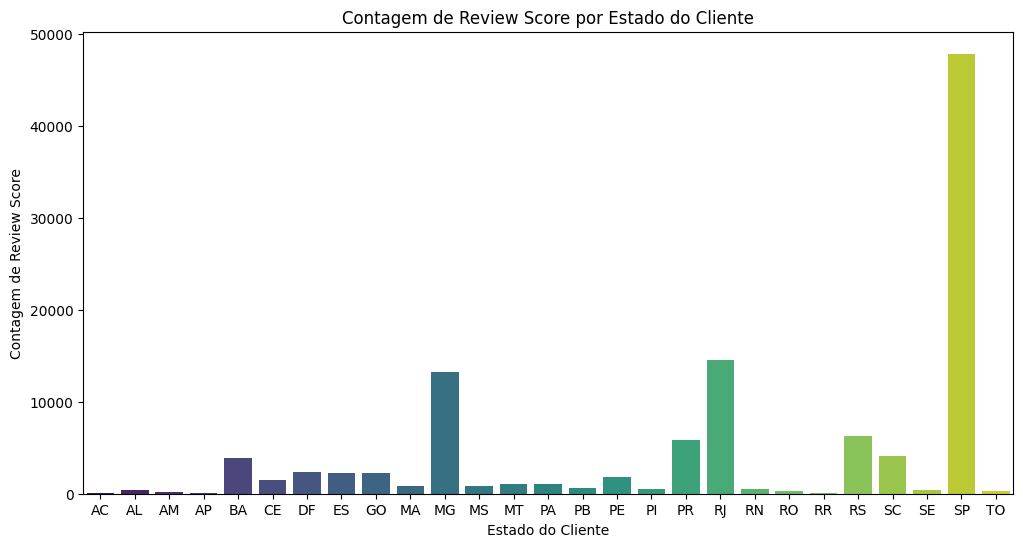

In [95]:
# Calcular a contagem das avaliações por estado
contagem_por_estado = merged_data.groupby('customer_state')['review_score'].count().reset_index()

# Criar um gráfico de barras com a contagem das avaliações por estado
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='review_score', data=contagem_por_estado, palette='viridis')
plt.title('Contagem de Review Score por Estado do Cliente')
plt.xlabel('Estado do Cliente')
plt.ylabel('Contagem de Review Score')
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\4198986098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_agrupada', y='review_score', data=media_por_categoria, palette='viridis')


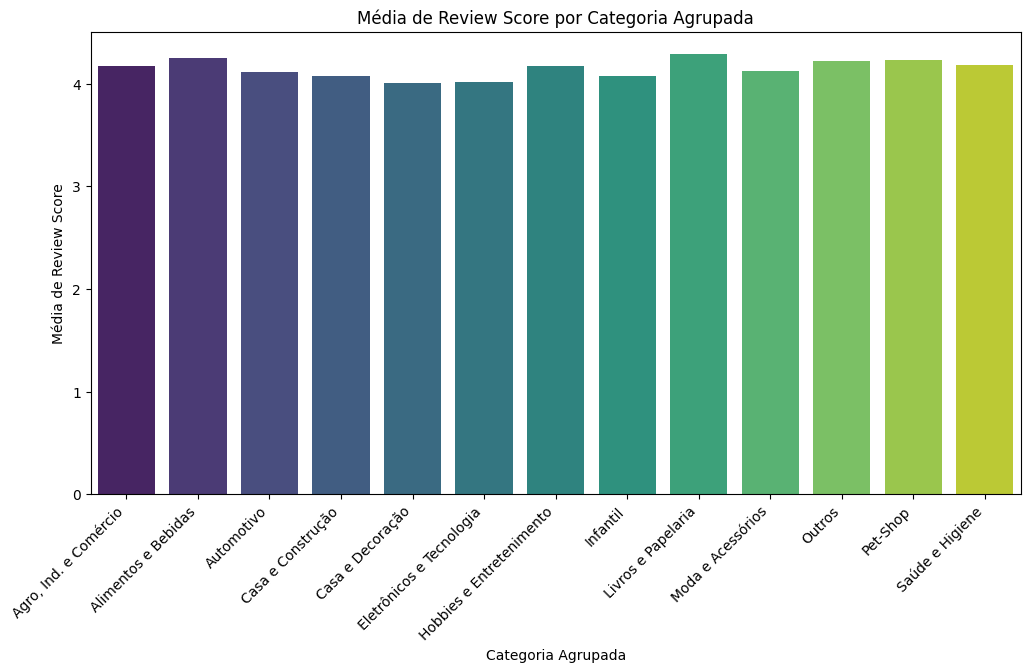

In [96]:
# Calcular a média das avaliações por categoria agrupada
media_por_categoria = merged_data.groupby('categoria_agrupada')['review_score'].mean().reset_index()

# Criar um gráfico de barras com a média das avaliações por categoria agrupada
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria_agrupada', y='review_score', data=media_por_categoria, palette='viridis')
plt.title('Média de Review Score por Categoria Agrupada')
plt.xlabel('Categoria Agrupada')
plt.ylabel('Média de Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()


count    113216.000000
mean         11.975657
std           9.361547
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: tempo_entrega, dtype: float64


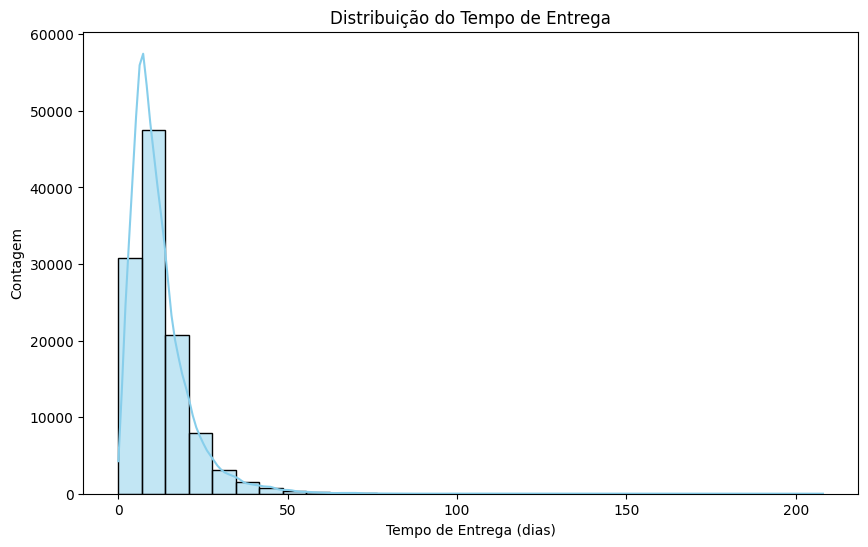

In [97]:
# Converte colunas de datas para o tipo datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])

# Calcula o tempo entre o pedido e a entrega
merged_data['tempo_entrega'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days

# Examina estatísticas descritivas
print(merged_data['tempo_entrega'].describe())

# Cria um histograma para visualizar a distribuição do tempo de entrega
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['tempo_entrega'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Contagem')
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\2129797926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_state', y='freight_value', data=custo_medio_por_estado, palette='viridis')


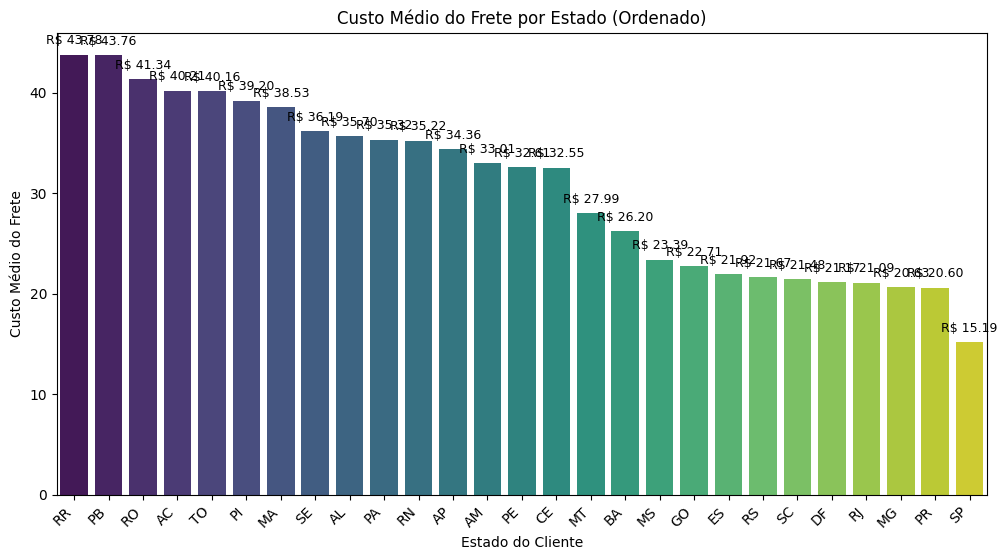

In [98]:
# Calcular o custo médio do frete por estado
custo_medio_por_estado = merged_data.groupby('customer_state')['freight_value'].mean().reset_index()

# Ordenar o DataFrame pelo custo médio do frete em ordem decrescente
custo_medio_por_estado = custo_medio_por_estado.sort_values(by='freight_value', ascending=False)

# Criar um gráfico de barras com o custo médio do frete por estado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_state', y='freight_value', data=custo_medio_por_estado, palette='viridis')

# Adicionar rótulos no topo de cada barra
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Custo Médio do Frete por Estado (Ordenado)')
plt.xlabel('Estado do Cliente')
plt.ylabel('Custo Médio do Frete')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\2887457624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='freight_value', data=custo_medio_por_estado, palette='viridis')


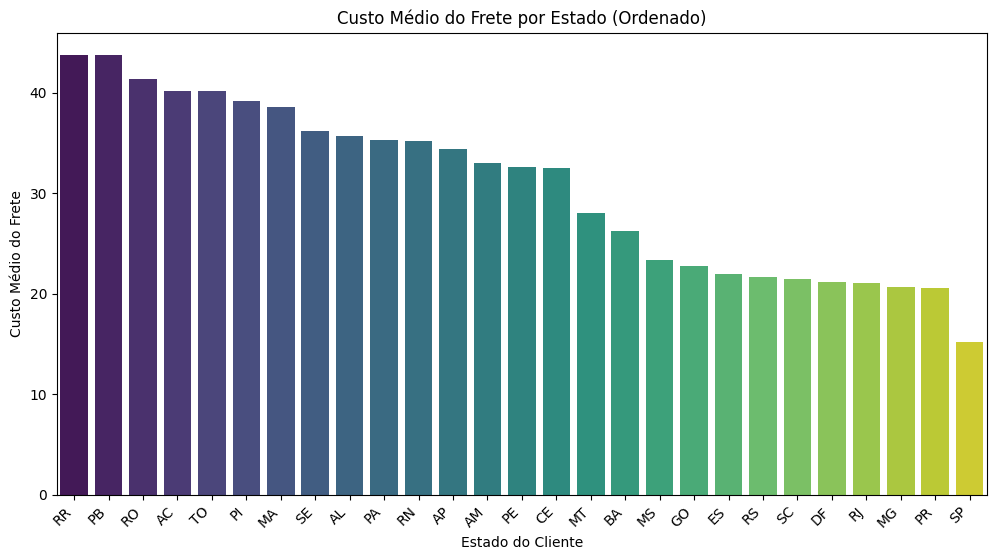

In [99]:
# Criar um gráfico de barras com o custo médio do frete por estado
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='freight_value', data=custo_medio_por_estado, palette='viridis')

plt.title('Custo Médio do Frete por Estado (Ordenado)')
plt.xlabel('Estado do Cliente')
plt.ylabel('Custo Médio do Frete')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\750380145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_por_categoria.values, y=contagem_por_categoria.index, palette='viridis')


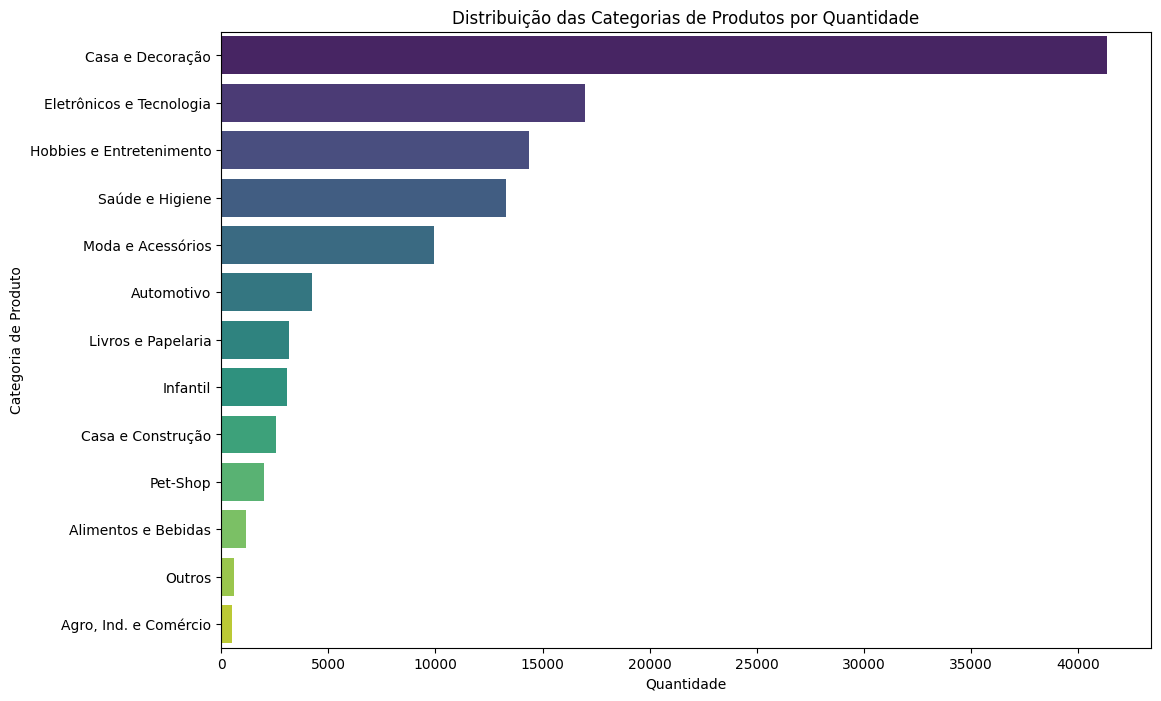

In [100]:
# Calcular a contagem de produtos por categoria
contagem_por_categoria = merged_data['categoria_agrupada'].value_counts()

# Criar um gráfico de barras horizontal para visualizar a distribuição das categorias
plt.figure(figsize=(12, 8))
sns.barplot(x=contagem_por_categoria.values, y=contagem_por_categoria.index, palette='viridis')
plt.title('Distribuição das Categorias de Produtos por Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('Categoria de Produto')
plt.show()

Mostrando o produto mais caro da base de dados

In [104]:
produto_mais_caro = merged_data.loc[merged_data["price"].idxmax()]

produto_mais_caro[['product_id', 'categoria_agrupada', 'price']]

product_id            489ae2aa008f021502940f251d4cce7f
categoria_agrupada                    Casa e Decoração
price                                           6735.0
Name: 79965, dtype: object

Mostrando o produto mais barato da base de dados

In [107]:
produto_mais_barato = merged_data.loc[merged_data["price"].idxmin()]

produto_mais_barato[["product_id", "categoria_agrupada", "price"]]

product_id            8a3254bee785a526d548a81a9bc3c9be
categoria_agrupada                   Casa e Construção
price                                             0.85
Name: 79759, dtype: object

Mostrando a quantidade de clientes por estado

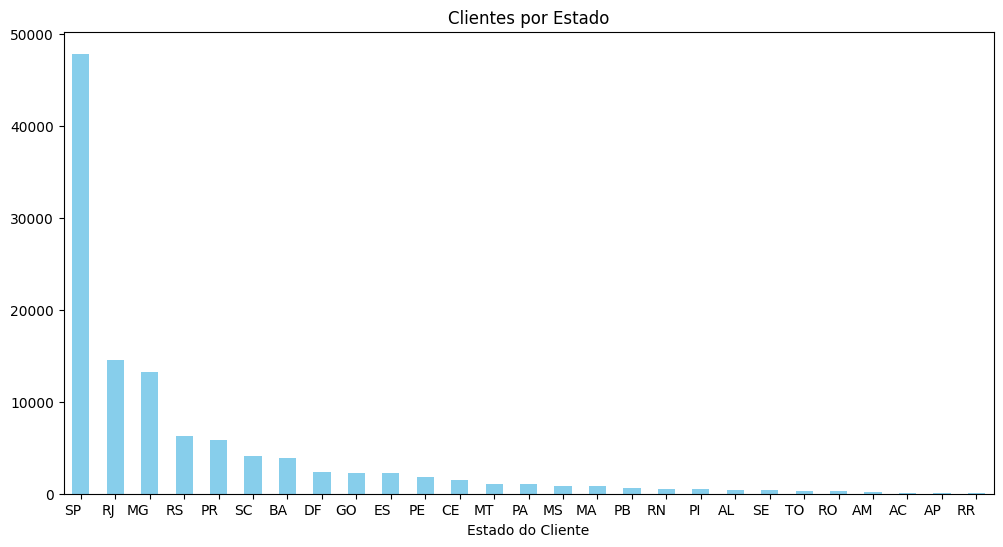

In [108]:
# Agrupamento dos clientes por estado 
clientes_por_estado = merged_data['customer_state'].value_counts()

plt.figure(figsize=(12, 6))

clientes_por_estado.plot(kind="bar", color="skyblue")
plt.title("Clientes por Estado")
plt.xlabel("Estado do Cliente")
plt.xticks(rotation=0, ha='right')
plt.show()

Mostrando as 5 cidades com mais clientes 

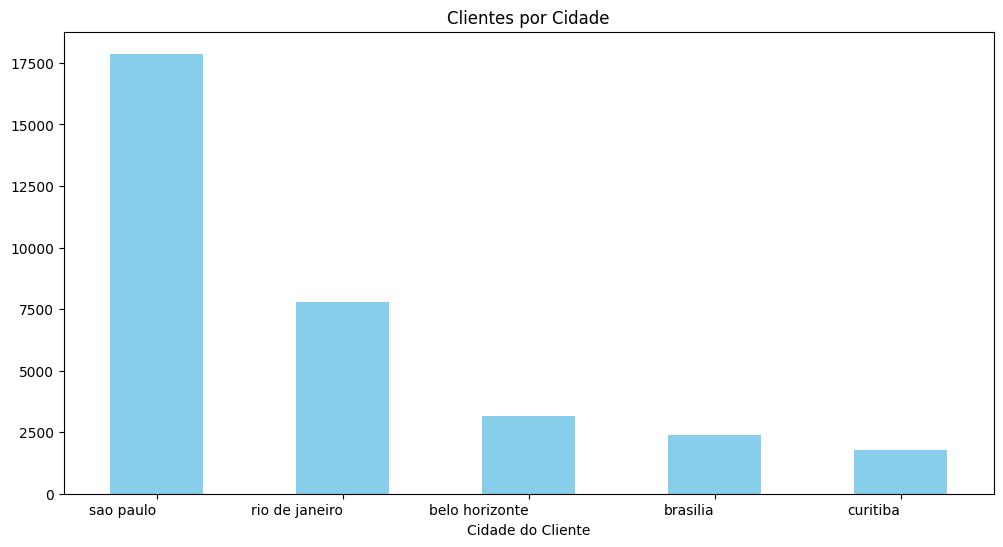

In [109]:
clientes_por_cidade = merged_data["customer_city"].value_counts()

plt.figure(figsize=(12, 6))
clientes_por_cidade.head().plot(kind="bar", color="skyblue")
plt.title("Clientes por Cidade")
plt.xlabel("Cidade do Cliente")
plt.xticks(rotation=0, ha="right")
plt.show()

Criando uma função para mostrar o total de faturamento por categoria em um estado específico.

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\3578398786.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_categoria.index, y=total_pagamentos_por_categoria.values, palette='viridis')


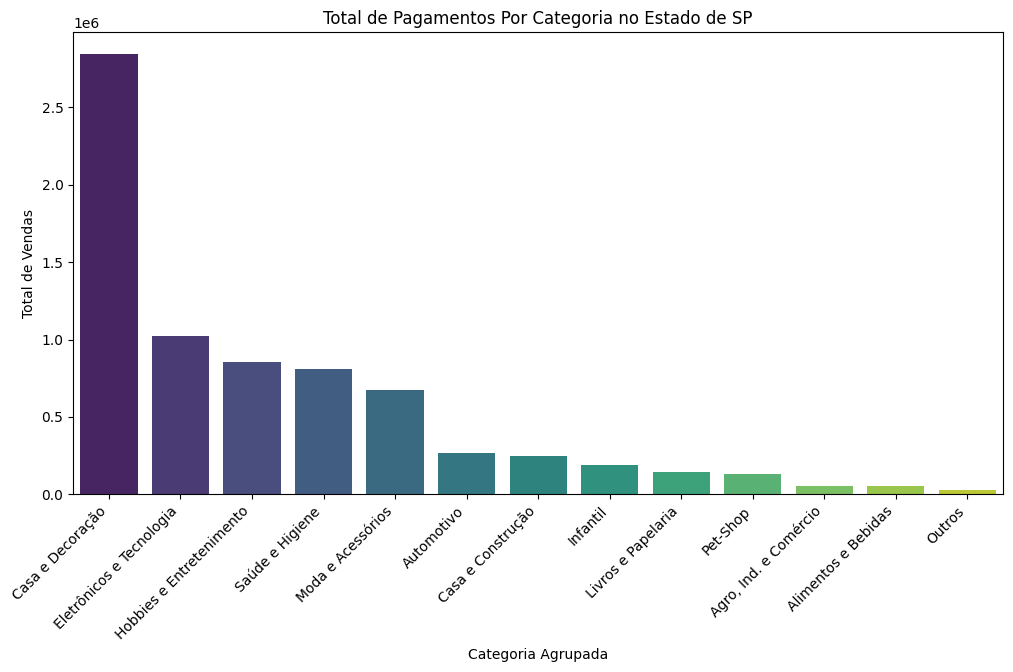

In [117]:
def mostrar_total_pagamentos_por_categoria(sigla_estado: str) -> None:
    """
    Calcula o total de pagamentos por categoria para compras realizadas em um estado específico e mostra
    em um gráfico

    Parâmetros:
    - sigla_estado: Sigla do estado para o qual calcular o total de pagamentos.

    Retorna:
    - Nenhum valor de retorno. Mostra um gráfico de barras com os dados calculados.
    """

    total_pagamentos_por_categoria = merged_data[merged_data["customer_state"] == sigla_estado].groupby("categoria_agrupada")["payment_value"].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))

    sns.barplot(x=total_pagamentos_por_categoria.index, y=total_pagamentos_por_categoria.values, palette='viridis')
    plt.title(f'Total de Pagamentos Por Categoria no Estado de {sigla_estado}')
    plt.xlabel('Categoria Agrupada')
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
    plt.show()

mostrar_total_pagamentos_por_categoria("SP")

Criando um função que retorna uma série contendo o total de faturamento por categoria em um ano específico

In [122]:
def total_pagamentos_por_categoria_no_ano(ano: int):
    """
    Calcula o total de pagamentos por categoria para compras realizadas em um ano específico.

    Parâmetros:
    - ano: Ano para o qual calcular o total de pagamentos.

    Retorna:
    - Série contendo o total de faturamento por categoria, ordenada em ordem decrescente.
    """

    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data[merged_data["order_purchase_timestamp"].dt.year == ano].groupby("categoria_agrupada")["payment_value"].sum().sort_values(ascending=False)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\2293965767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_ano_2018.index, y=total_pagamentos_ano_2018.values, palette='viridis')


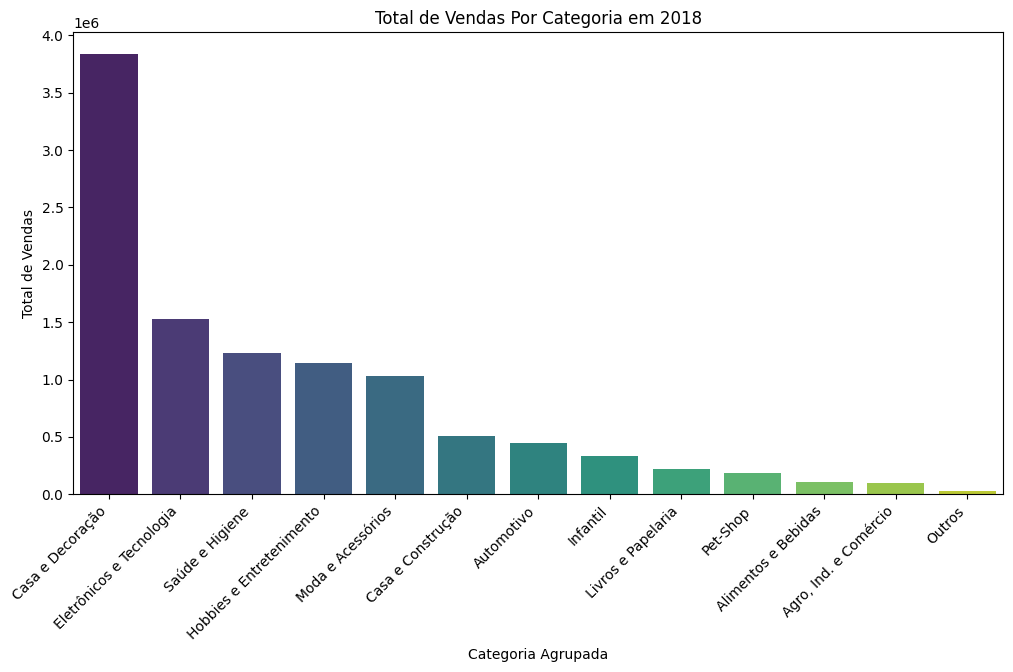

In [123]:
total_pagamentos_ano_2018 = total_pagamentos_por_categoria_no_ano(2018)

total_pagamentos_ano_2018

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_ano_2018.index, y=total_pagamentos_ano_2018.values, palette='viridis')
plt.title(f'Total de Vendas Por Categoria em 2018')
plt.xlabel('Categoria Agrupada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()

Criando um função que retorna uma série contendo o total de faturamento por ano em um estado específico


In [124]:
def total_pagamentos_por_ano_no_estado(sigla_estado: str):
    """
    Calcula o total de faturamento por ano para um estado específico.

    Parâmetros:
    - sigla_estado: Sigla do estado para o qual calcular o total de pagamentos.

    Retorna:
    - Série contendo o total de faturmento por ano.,
    """
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
    
    return merged_data.loc[merged_data["customer_state"] == sigla_estado].groupby(pd.Grouper(key = 'order_purchase_timestamp', freq='Y'))["payment_value"].sum()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\1302709583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')


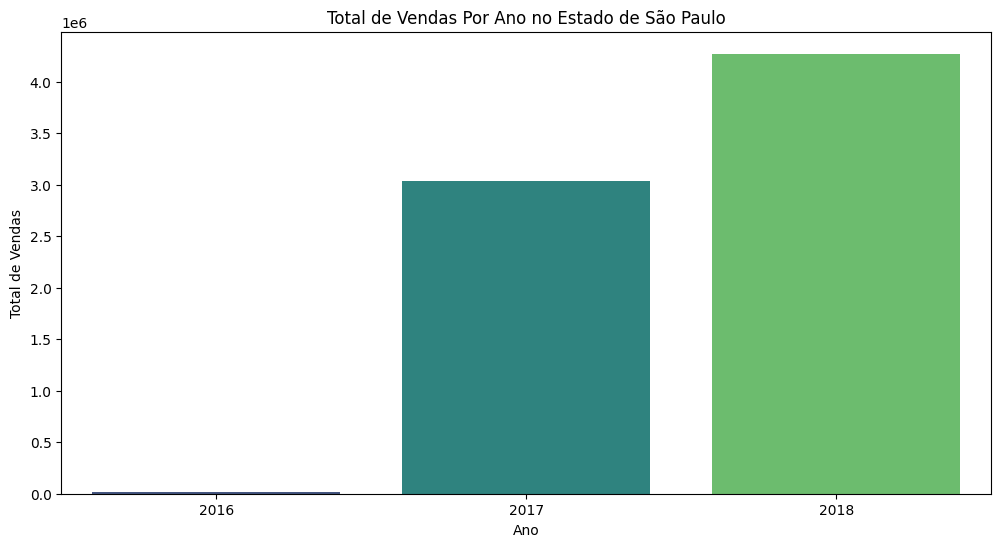

In [125]:
total_pagamentos_por_ano_sao_paulo = total_pagamentos_por_ano_no_estado("SP")

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')
plt.title(f'Total de Vendas Por Ano no Estado de São Paulo')
plt.xlabel('Ano')
xticks_originais = plt.gca().get_xticks()
plt.xticks(xticks_originais, ["2016", "2017", "2018"])
plt.ylabel('Total de Vendas')
plt.show()

Criando um função que retorna uma série contendo o total de faturamento por ano em uma cidade específica


In [128]:
def total_pagamentos_por_ano_na_cidade(cidade: str):
    """
    Calcula o total de pagamentos por ano para um estado específico.

    Parâmetros:
    - estado: Sigla do estado para o qual calcular o total de pagamentos..

    Retorna:
    - Série contendo o total de pagamentos por ano.
    """
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data.loc[merged_data["customer_city"] == cidade].groupby(pd.Grouper(key = 'order_purchase_timestamp', freq='Y'))["payment_value"].sum()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\266241244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')


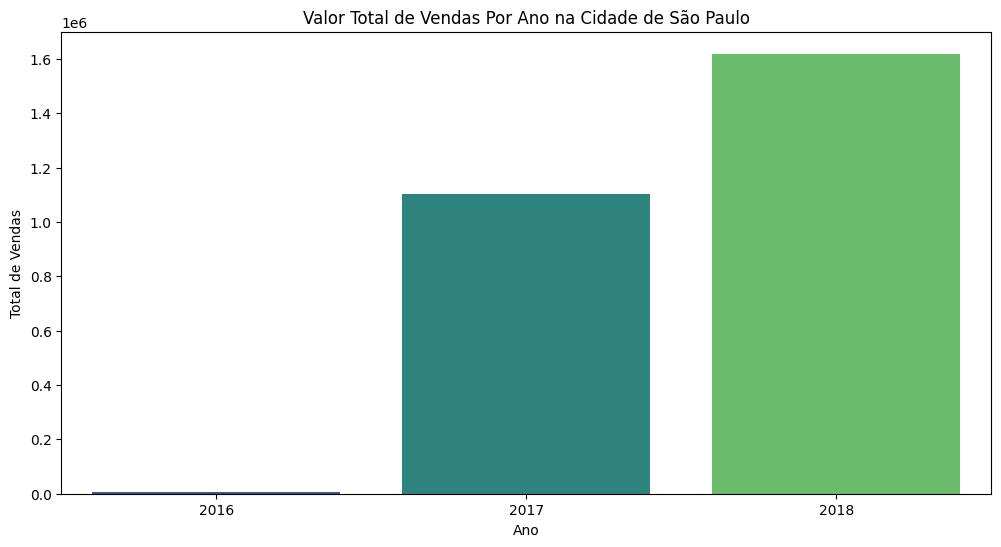

In [129]:
total_pagamentos_por_ano_sao_paulo = total_pagamentos_por_ano_na_cidade("sao paulo")

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')
plt.title('Valor Total de Vendas Por Ano na Cidade de São Paulo')
plt.xlabel('Ano')
xticks_originais = plt.gca().get_xticks()
plt.xticks(xticks_originais, ["2016", "2017", "2018"])
plt.ylabel('Total de Vendas')  
plt.show()

Mostrando o total de vendas por estado

C:\Users\Pichau\AppData\Local\Temp\ipykernel_8196\1601720866.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_vendas_por_estado.index, y=total_vendas_por_estado.values, palette='viridis')


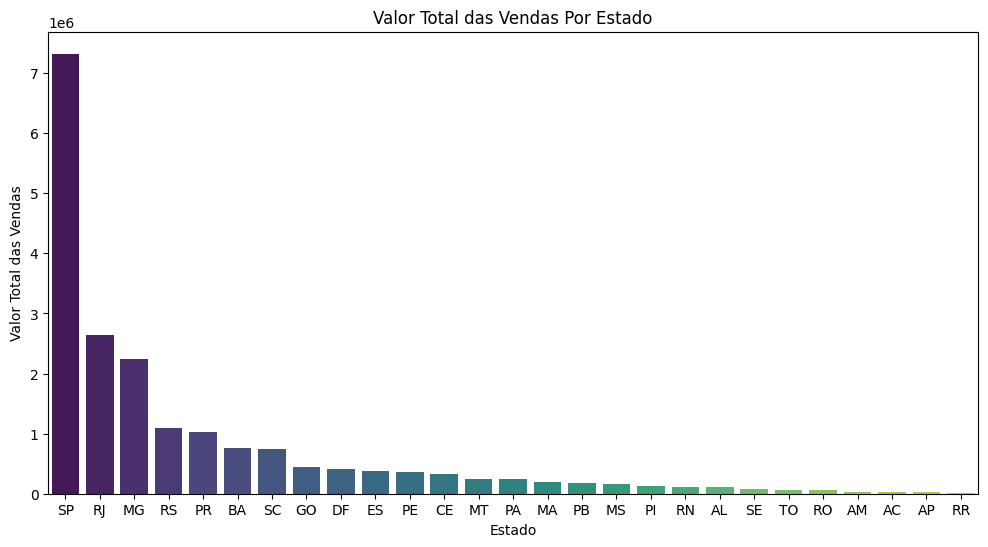

In [130]:
total_vendas_por_estado = merged_data.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False)

total_vendas_por_estado

plt.figure(figsize=(12, 6))

sns.barplot(x=total_vendas_por_estado.index, y=total_vendas_por_estado.values, palette='viridis')
plt.title('Valor Total das Vendas Por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Total das Vendas')
plt.show()

Criando uma nuvem de palavras utilizando a biblioteca `wordcloud` a partir da coluna `review_comment_message` da tabela `olist_order_reviews_dataset`.

In [132]:
from wordcloud import WordCloud

reviews = pd.read_csv("../data/brazilian_ecommerce/olist_order_reviews_dataset.csv", na_values = lista_labels_valores_ausentes)
reviews_limpa = reviews.dropna()

text = ' '.join(reviews_limpa['review_comment_message'].astype(str))
text = text.lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


Mostrando a nuvem de palavras

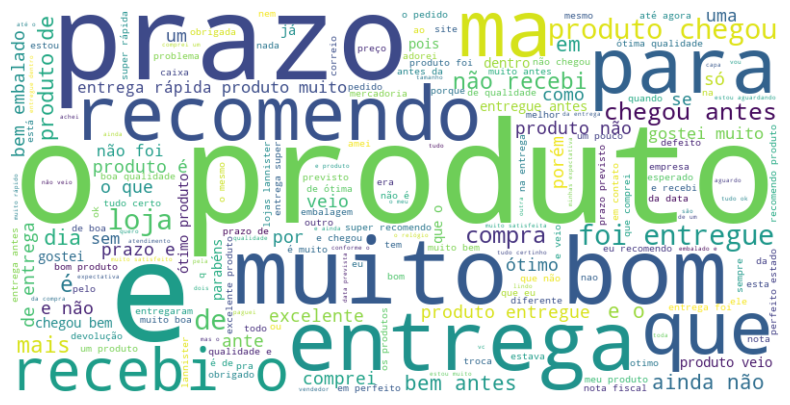

In [133]:
# Wordcloud com todas as reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Selecionando os reviews com base no `review_score`

In [134]:
#Selecionando os reviews com base no Score
selecao_1_3 =(reviews_limpa['review_score'] >=1) & (reviews_limpa['review_score'] <= 3)
comentarios_1_3 = reviews_limpa.loc[selecao_1_3, 'review_comment_message']

selecao_4_5 = (reviews_limpa['review_score'] >= 4) & (reviews_limpa['review_score'] <= 5)
comentarios_4_5 = reviews_limpa.loc[selecao_4_5, 'review_comment_message']

Definindo como low rate os comentários com 1 a 3 estrelas

In [135]:
# Definindo como low rate os comentários com 1 a 3 estrelas
low_rate = ' '.join(comentarios_1_3.astype(str))
low_rate = low_rate.lower()

Criando uma função para filtrar a nuvem de palavras

In [137]:
# Dando uma filtrda no wordcloud
def remover_palavra(texto: str, palavra_a_remover: str) -> str:
    """
    Remove uma palavra específica de um texto.

    Parâmetros:
    - texto (str): O texto original do qual a palavra será removida.
    - palavra_a_remover (str): A palavra que será removida do texto.

    Retorna:
    - str: O texto resultante após a remoção da palavra especificada.
    """
    palavras = texto.split()
    palavras_sem_palavra = [palavra for palavra in palavras if palavra != palavra_a_remover]
    texto_sem_palavra = ' '.join(palavras_sem_palavra)
    
    return texto_sem_palavra

Filtrando nuvem de palavras `low_rate`

In [140]:
palavras_indesejadas = ['que', 'produto', 'e', 'de', 'é', 'para', 'comprei', 'uma', 'um', 'o']

low_rate = ' '.join([palavra for palavra in low_rate.split() if palavra not in palavras_indesejadas])


Mostrando a nuvem de palavras `low_rate`

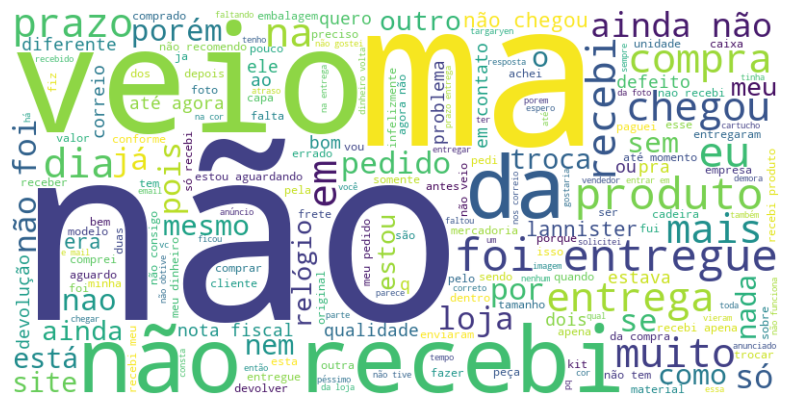

In [144]:
# Wordcloud das reviews com classificação baixa (low rate)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rate)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Definindo high rate os comentários com 4 e 5 estrelas

In [145]:
# definindo high rate os comentários com 4 e 5 estrelas
high_rate = ' '.join(comentarios_4_5.astype(str))
high_rate = high_rate.lower()

Mostrando a nuvem de palavras `high_rate`

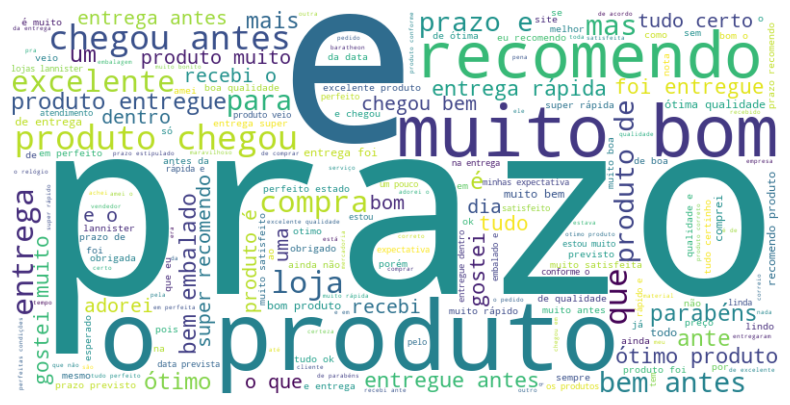

In [146]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rate)
# Wordcloud com alta classificação ( high rate)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()